In [2]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud



In [3]:
#===========================================================
#Load Dataset
#===========================================================
print("Loading 20 Newsgroups dataset...")
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(type(data))
print(data.keys())
print(f"Number of documents: {len(data.data)}")
print(f"Number of categories: {len(data.target_names)}")
print("Single document example:" ,data.data[0])

for i in range(3):
    print(f"\n--- Document {i} ---\n")
    print(data.data[i][:1000])  # Print first 1000 characters of the document

print("Label ID:", data.target[0])
print("Category:",data.target_names[data.target[0]])


Loading 20 Newsgroups dataset...
<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
Number of documents: 18846
Number of categories: 20
Single document example: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!



--- Document 0 ---



I am sure some bashers of Pens fans are pretty co

In [4]:
#use 4 categories for easier visualization
categories = ['sci.space', 'comp.graphics', 'talk.politics.mideast', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='train',categories=categories,remove=('headers','footers','quotes'))

df = pd.DataFrame({'text':newsgroups.data, 'target':newsgroups.target})
df['category_name'] = df['target'].apply(lambda x: newsgroups.target_names[x])
print(f"Dataset shape: {df.shape}")
print(df.head())


Dataset shape: (2341, 3)
                                                text  target  \
0  : 8~> I require BGI drivers for Super VGA Disp...       0   
1  \tAll humans suffered emotionally, some Jews a...       3   
2  \n\nSo was it on CNN or not? \n\n\n\nWhat proo...       3   
3  \tAre people here stupid or what??? It is a ti...       1   
4  Hello,\n\n    I have been searching for a qual...       0   

           category_name  
0          comp.graphics  
1  talk.politics.mideast  
2  talk.politics.mideast  
3       rec.sport.hockey  
4          comp.graphics  



--- Starting data exploration ---


C:\Users\MODERN\AppData\Local\Temp\ipykernel_27608\575712577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_name',data=df, palette='viridis')


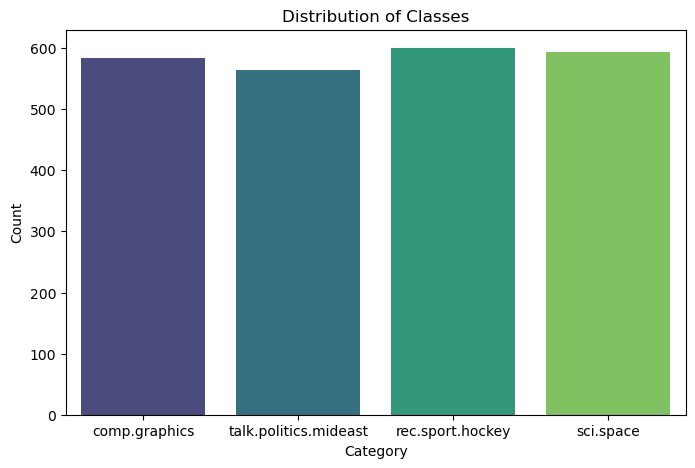

In [6]:
#============================================================
#Data Exploration
#============================================================
print("\n--- Starting data exploration ---")
#Class Distribution Check
#Why? To Ensure one category doesn't dominate the dataset (Class Imbalance)
plt.figure(figsize=(8,5))
sns.countplot(x='category_name',data=df, palette='viridis')
plt.title('Distribution of Classes')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

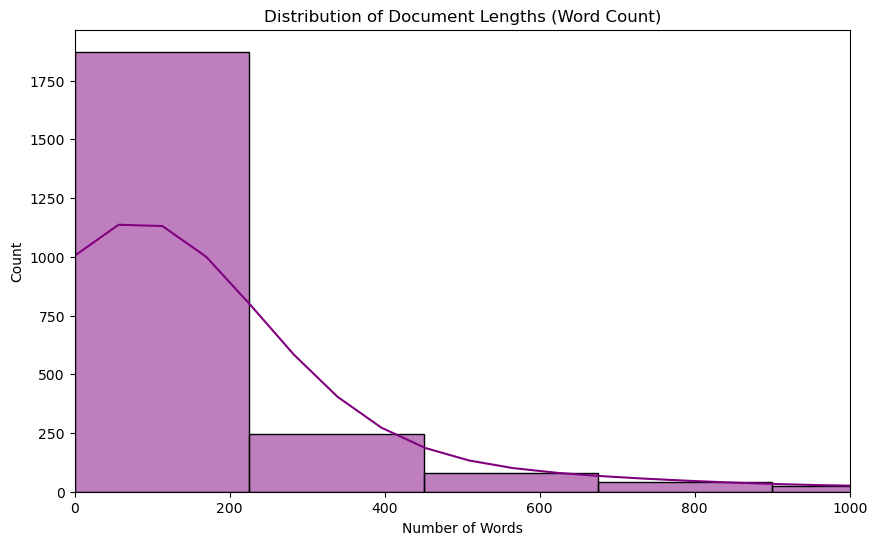

Average Word Count: 226.79
Min Word Count: 0


In [7]:
#Text Length Analysis
#Why? To see if we have empty files or extremely long documents
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
sns.histplot(df['word_count'], bins=50, kde=True, color='purple')
plt.title('Distribution of Document Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.xlim(0,1000) #Limiting the x-axis to zoom in on the majority
plt.show()

print(f"Average Word Count: {df['word_count'].mean():.2f}")
print(f"Min Word Count: {df['word_count'].min()}")
#If Min is 0, we have empty rows to clean!

In [8]:
#===========================================================
#data Preprocessing
#===========================================================
print("\n--- Starting data preprocessing ---")

#Define a Cleaning Function
def clean_text(text):
    #1.Lowercase
    text = text.lower()
    #2.Remove special characters and numbers (keep only letters)
    text = re.sub(r'[^a-zA-Z\s]','', text)
    #3.Remove multiple spaces
    text = re.sub(r'\s+',' ',text).strip()
    return text
#Apply Cleaning
df['clean_text'] = df['text'].apply(clean_text)

#Drop empty rows
initial_count = len(df)
df = df[df['clean_text'].str.len() > 0]
print(f"Removed {initial_count - len(df)} empty documents after cleaning.")

#Show comparison
print("\n[Example Before Cleaning]:")
print(df['text'].iloc[0][:200]) #First 200 chars
print("\n[Example After Cleaning]:")
print(df['clean_text'].iloc[0][:200]) #First 200 chars


--- Starting data preprocessing ---
Removed 64 empty documents after cleaning.

[Example Before Cleaning]:
: 8~> I require BGI drivers for Super VGA Displays and Super XVGA Displays. Does 
: 8~> anyone know where I could obtain the relevant drivers ? (FTP sites ??)

: 	I would like to know too!

: Regards,

[Example After Cleaning]:
i require bgi drivers for super vga displays and super xvga displays does anyone know where i could obtain the relevant drivers ftp sites i would like to know too regards dominic garbouwasafi or one o



--- Generating WrordCloud for 'sci.space'---


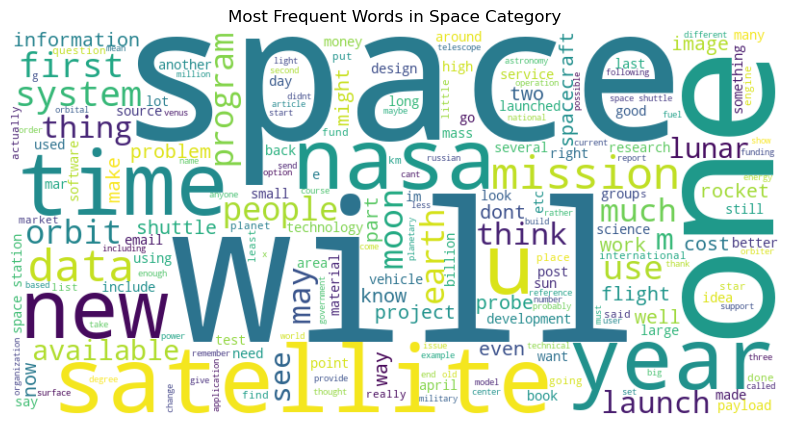

In [10]:
#==========================================================
#Wordcloud Visualization
#==========================================================
#Why? To see the most frequent words in a specific category(e.g.space)
print("\n--- Generating WrordCloud for 'sci.space'---")

space_text = " ".join(df[df['category_name'] == 'sci.space']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(space_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud.to_image(), interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Space Category')
plt.show()